In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

sns.set(style="whitegrid")

## Đọc dữ liệu

In [ ]:
print("Đọc toàn bộ dữ liệu đã xử lý...")
df = pd.read_csv("./datasets/preprocessing_data/clean_data.csv")

Đọc toàn bộ dữ liệu đã xử lý...


## Tổng quan dữ liệu
- Xem 5 dòng đầu  tiên của dữ liệu
- Thông tin tổng quan về kiểu dữ liệu và số lượng giá trị không null
- Thống kê mô tả các cột số
- Kiểu dữ liệu từng cột

In [ ]:
print("1. Kích thước dữ liệu:", df.shape)
print("\n2. 5 dòng đầu:")
display(df.head())

print("\n3. Thông tin dữ liệu:")
df.info()

print("\n4. Thống kê mô tả:")
display(df.describe(include='all'))

print("\n5. Kiểu dữ liệu từng cột:")
print(df.dtypes)

1. Kích thước dữ liệu: (68747, 2052)

2. 5 dòng đầu:


f0        f1        f2        f3        f4        f5        f6  \
0  1.454779  0.332419  1.416820 -0.006741  0.683826 -0.142017  1.076746   
1  1.441528  0.236847  1.967243 -1.295890  0.069074 -0.966756  0.811236   
2  0.136968  1.665962 -0.376546 -1.295890  1.898967 -1.150880  0.625723   
3 -0.911747  1.696568 -0.484757 -0.504819  1.318154 -1.218746 -0.726324   
4  1.073342  0.082724  1.684083  0.799749 -1.092879  1.220996  0.674344   

         f7        f8        f9  ...     f2042     f2043     f2044     f2045  \
0 -0.796844 -0.516145  0.525883  ... -1.294151 -1.208820  0.597542 -0.637834   
1 -0.013619  0.943143  0.465158  ... -1.205557  1.139347 -0.681338  0.222070   
2  0.826268  1.587842  0.622721  ... -1.294151 -1.286575 -1.163347  0.721716   
3 -0.349586 -0.816643 -0.313657  ... -1.080129  0.779781 -1.163347 -0.325345   
4 -0.178607  0.006729  1.531725  ...  0.233846 -1.114730 -1.004124 -0.508444   

      f2046     f2047  label  class_name            filename  split  
0  1.556661  1.765411     25     hamster   hamster_10609.jpg  train  
1  0.794373  1.091254     28      rabbit    rabbit_10249.jpg  train  
2  0.597560  0.147749      0    antelope  antelope_10538.jpg  train  
3  0.934022 -0.587951     23        seal      seal_10478.jpg  train  
4  0.671307  1.434455     23        seal      seal_10801.jpg  train  

[5 rows x 2052 columns]


3. Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68747 entries, 0 to 68746
Columns: 2052 entries, f0 to split
dtypes: float64(2048), int64(1), object(3)
memory usage: 1.1+ GB

4. Thống kê mô tả:


f0            f1            f2            f3            f4  \
count   68747.000000  68747.000000  68747.000000  68747.000000  68747.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.068311     -0.070546      0.062668      0.040170     -0.087300   
std         1.031558      1.004395      1.003099      1.005556      0.962076   
min        -1.161192     -1.522127     -1.187786     -1.295890     -1.108721   
25%        -0.944900     -0.964142     -0.934866     -0.900535     -0.996994   
50%        -0.104508     -0.116890     -0.035631     -0.052056     -0.356004   
75%         1.007084      0.735849      0.957495      0.913684      0.700124   
max         2.023033      2.642365      2.038872      2.088318      1.945517   

                  f5            f6            f7            f8            f9  \
count   68747.000000  68747.000000  68747.000000  68747.000000  68747.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       -0.043857     -0.012536     -0.072805      0.052433      0.113641   
std         1.012349      1.014963      0.975215      1.006175      1.047910   
min        -1.284964     -1.439871     -1.125041     -1.210311     -1.261527   
25%        -1.021783     -0.945676     -1.006234     -0.893064     -0.877179   
50%        -0.194432     -0.065091     -0.331655     -0.103075      0.008447   
75%         0.832791      0.839189      0.745624      0.903544      1.017425   
max         2.149166      2.396347      1.984036      2.027727      2.092067   

        ...         f2042         f2043         f2044         f2045  \
count   ...  68747.000000  68747.000000  68747.000000  68747.000000   
unique  ...           NaN           NaN           NaN           NaN   
top     ...           NaN           NaN           NaN           NaN   
freq    ...           NaN           NaN           NaN           NaN   
mean    ...      0.064746     -0.012667     -0.064528     -0.089918   
std     ...      1.024471      1.008755      0.983776      0.984984   
min     ...     -1.294151     -1.286575     -1.163347     -1.314661   
25%     ...     -0.910457     -0.994648     -1.029143     -1.039925   
50%     ...     -0.004566     -0.123977     -0.276769     -0.208313   
75%     ...      0.948592      0.861465      0.780992      0.752137   
max     ...      2.165222      2.202622      2.005247      2.188361   

               f2046         f2047         label  class_name        filename  \
count   68747.000000  68747.000000  68747.000000       68747           68747   
unique           NaN           NaN           NaN          50           37322   
top              NaN           NaN           NaN       horse  mole_10072.jpg   
freq             NaN           NaN           NaN        1645              25   
mean        0.073124     -0.009569     24.658589         NaN             NaN   
std         1.020865      1.003460     14.409327         NaN             NaN   
min        -1.156954     -1.201977      0.000000         NaN             NaN   
25%        -0.893955     -0.980787     12.000000         NaN             NaN   
50%        -0.116355     -0.169449     25.000000         NaN             NaN   
75%         0.923349      0.838017     37.000000         NaN             NaN   
max         2.025697      2.050941     49.000000         NaN             NaN   

        split  
count   68747  
unique      3  
top     train  
freq    57550  
mean      NaN  
std       NaN  
min       NaN  
25%       NaN  
50%       NaN  
75%       NaN  
max       NaN  

[11 rows x 2052 columns]


5. Kiểu dữ liệu từng cột:
f0            float64
f1            float64
f2            float64
f3            float64
f4            float64
               ...   
f2047         float64
label           int64
class_name     object
filename       object
split          object
Length: 2052, dtype: object


## Kiểm tra thiếu dữ liệu và trùng filename

In [ ]:
print("Thiếu dữ liệu:")
print(df.isnull().sum())
print("Filename trùng:", df.duplicated(subset='filename').sum())

Thiếu dữ liệu:
f0            0
f1            0
f2            0
f3            0
f4            0
             ..
f2047         0
label         0
class_name    0
filename      0
split         0
Length: 2052, dtype: int64
Filename trùng: 31425


In [ ]:
!python3 -m pip -V

pip 24.1.2 from /usr/local/lib/python3.11/dist-packages/pip (python 3.11)


In [ ]:
!python3 -m pip install plotly seaborn umap-learn

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from collections import Counter
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Thiết lập style cho matplotlib
plt.style.use('default')
sns.set_palette("husl")

In [ ]:
class DataVisualizationTool:
    def __init__(self, df, id2name=None):
        """
        df: DataFrame chứa dữ liệu
        id2name: dict ánh xạ label → tên class (nếu class_name không có sẵn)
        """
        self.df = df.copy()
        self.feature_cols = [col for col in df.columns if col.startswith('f') and col[1:].isdigit()]
        self.X = self.df[self.feature_cols].values
        self.labels = self.df['label'].values

        # Xử lí class_column
        # Nếu có cột class_name thì dùng
        if 'class_name' in self.df.columns:
            self.df['class_column'] = self.df['class_name']
        # Nếu không, thử ánh xạ từ label sang tên
        elif id2name:
            self.df['class_column'] = self.df['label'].map(id2name)
        else:
            # Không có ánh xạ thì giữ nguyên label dưới dạng chuỗi
            self.df['class_column'] = self.df['label'].astype(str)

        # Biến này sẽ dùng thống nhất cho tất cả các biểu đồ
        self.y = self.df['class_column'].values

        #self.X_scaled = self.X  # đã chuẩn hóa từ trước
        self.X_scaled = self.df[self.feature_cols].astype(float).values

        print(f"Số lượng features: {len(self.feature_cols)}")
        print(f"Số lượng samples: {len(self.df)}")
        print(f"Số lượng classes: {len(np.unique(self.y.astype(str)))}")
        print(f"Phân phối nhãn: {Counter(self.labels)}")

    def plot_pca_analysis(self, n_components=10):
        """
        Phân tích PCA và vẽ biểu đồ explained variance
        """
        pca = PCA(n_components=n_components)
        pca.fit(self.X_scaled)

        # Tạo subplot
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Phân tích PCA', fontsize=16, fontweight='bold')

        # 1. Explained Variance Ratio
        axes[0,0].bar(range(1, n_components+1), pca.explained_variance_ratio_)
        axes[0,0].set_title('Tỉ lệ Phương sai Giải thích của từng PC')
        axes[0,0].set_xlabel('Principal Component')
        axes[0,0].set_ylabel('Explained Variance Ratio')

        # 2. Cumulative Explained Variance
        cumsum = np.cumsum(pca.explained_variance_ratio_)
        axes[0,1].plot(range(1, n_components+1), cumsum, 'bo-')
        axes[0,1].set_title('Phương sai Giải thích Tích lũy')
        axes[0,1].set_xlabel('Principal Component')
        axes[0,1].set_ylabel('Cumulative Explained Variance')
        axes[0,1].grid(True, alpha=0.3)

        # 3. PCA transformation và scatter plot
        X_pca = pca.transform(self.X_scaled)

        # Nếu đã có PCA1, PCA2 trong data thì sử dụng
        if 'PCA1' in self.df.columns and 'PCA2' in self.df.columns:
            scatter = axes[1,0].scatter(self.df['PCA1'], self.df['PCA2'],
                                      c=self.labels, cmap='tab20', alpha=0.7)
            axes[1,0].set_xlabel('PCA1')
            axes[1,0].set_ylabel('PCA2')
        else:
            scatter = axes[1,0].scatter(X_pca[:, 0], X_pca[:, 1],
                                      c=self.labels, cmap='tab20', alpha=0.7)
            axes[1,0].set_xlabel('PC1')
            axes[1,0].set_ylabel('PC2')

        axes[1,0].set_title('PCA Scatter Plot (2D)')
        plt.colorbar(scatter, ax=axes[1,0])

        # 4. Feature importance của PC1 và PC2
        feature_importance = np.abs(pca.components_[:2]).mean(axis=0)
        top_features_idx = np.argsort(feature_importance)[-20:]  # Top 20 features

        axes[1,1].barh(range(len(top_features_idx)), feature_importance[top_features_idx])
        axes[1,1].set_yticks(range(len(top_features_idx)))
        axes[1,1].set_yticklabels([f'f{i}' for i in top_features_idx])
        axes[1,1].set_title('Top 20 Features quan trọng nhất (PC1 & PC2)')
        axes[1,1].set_xlabel('Importance Score')

        plt.tight_layout()
        plt.show()

        return pca, X_pca

    def plot_interactive_scatter(self, method='pca', n_components=2):
        """
        Tạo scatter plot tương tác với Plotly
        method: 'pca', 'tsne', 'umap'
        """
        if method == 'pca':
            if 'PCA1' in self.df.columns and 'PCA2' in self.df.columns:
                # Sử dụng PCA có sẵn
                X_reduced = self.df[['PCA1', 'PCA2']].values
                title = "PCA Visualization (Có sẵn)"
                x_label, y_label = "PCA1", "PCA2"
            else:
                # Tính PCA mới
                pca = PCA(n_components=n_components)
                X_reduced = pca.fit_transform(self.X_scaled)
                title = f"PCA Visualization (Tính toán mới)"
                x_label, y_label = "PC1", "PC2"

        elif method == 'tsne':
            print("Đang chạy t-SNE... (có thể mất vài phút)")
            tsne = TSNE(n_components=2, random_state=42, perplexity=30)
            X_reduced = tsne.fit_transform(self.X_scaled)
            title = "t-SNE Visualization"
            x_label, y_label = "t-SNE 1", "t-SNE 2"

        elif method == 'umap':
            print("Đang chạy UMAP...")
            reducer = umap.UMAP(n_components=2, random_state=42)
            X_reduced = reducer.fit_transform(self.X_scaled)
            title = "UMAP Visualization"
            x_label, y_label = "UMAP 1", "UMAP 2"

        # Tạo DataFrame cho Plotly
        plot_df = pd.DataFrame({
            'x': X_reduced[:, 0],
            'y': X_reduced[:, 1],
            'class': self.y,
            'label': self.labels,
            'split': self.df['split'] if 'split' in self.df.columns else 'unknown'
        })

        # Tạo interactive plot
        fig = px.scatter(plot_df, x='x', y='y', color='class',
                        hover_data=['label', 'split'],
                        title=title,
                        labels={'x': x_label, 'y': y_label})

        fig.update_layout(
            width=900, height=700,
            title_font_size=16,
            showlegend=True
        )

        fig.show()

        return X_reduced

    def plot_class_distribution(self):
        """
        Vẽ phân phối các class
        """
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))

        # 1. Class distribution
        #class_counts = self.df['class_name'].value_counts()
        class_counts = self.df['class_column'].value_counts()
        axes[0].bar(range(len(class_counts)), class_counts.values)
        axes[0].set_xticks(range(len(class_counts)))
        axes[0].set_xticklabels(class_counts.index, rotation=45, ha='right')
        axes[0].set_title('Phân phối số lượng mẫu theo Class')
        axes[0].set_ylabel('Số lượng mẫu')

        # 2. Train/Test split nếu có
        if 'split' in self.df.columns:
            split_counts = self.df['split'].value_counts()
            colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
            axes[1].pie(split_counts.values, labels=split_counts.index,
                       autopct='%1.1f%%', colors=colors[:len(split_counts)])
            axes[1].set_title('Phân chia Train/Test')
        else:
            axes[1].text(0.5, 0.5, 'Không có thông tin\nphân chia dữ liệu',
                        ha='center', va='center', transform=axes[1].transAxes)
            axes[1].set_title('Train/Test Split')

        plt.tight_layout()
        plt.show()

    def plot_feature_analysis(self, sample_features=50):
        """
        Phân tích một số features ngẫu nhiên
        """
        # Chọn ngẫu nhiên một số features
        selected_features = np.random.choice(self.feature_cols,
                                           min(sample_features, len(self.feature_cols)),
                                           replace=False)

        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle(f'Phân tích {len(selected_features)} Features ngẫu nhiên',
                     fontsize=16, fontweight='bold')

        # 1. Distribution của features
        feature_data = self.df[selected_features].values.flatten()
        axes[0,0].hist(feature_data, bins=50, alpha=0.7, color='skyblue')
        axes[0,0].set_title('Phân phối giá trị của các Features')
        axes[0,0].set_xlabel('Giá trị Feature')
        axes[0,0].set_ylabel('Tần suất')

        # 2. Correlation heatmap của một số features
        sample_size = min(20, len(selected_features))
        sample_features_small = selected_features[:sample_size]
        corr_matrix = self.df[sample_features_small].corr()

        sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, ax=axes[0,1])
        axes[0,1].set_title(f'Ma trận tương quan ({sample_size} features)')

        # 3. Feature variance
        feature_vars = self.df[selected_features].var().sort_values(ascending=False)
        axes[1,0].bar(range(len(feature_vars)), feature_vars.values)
        axes[1,0].set_title('Phương sai của các Features')
        axes[1,0].set_xlabel('Feature Index')
        axes[1,0].set_ylabel('Variance')

        # 4. Box plot của một số features theo class
        #sample_classes = self.df['class_name'].unique()[:5]  # Lấy 5 class đầu
        sample_classes = self.df['class_column'].unique()[:5]
        sample_features_box = selected_features[:5]  # Lấy 5 features đầu

        box_data = []
        for feature in sample_features_box:
            for class_name in sample_classes:
                class_data = self.df[self.df['class_column'] == class_name][feature].values
                for value in class_data:
                    box_data.append({'feature': feature, 'class': class_name, 'value': value})

        box_df = pd.DataFrame(box_data)
        if len(box_df) > 0:
            sns.boxplot(data=box_df, x='feature', y='value', hue='class', ax=axes[1,1])
            axes[1,1].set_title('Box Plot: Features theo Class')
            axes[1,1].tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()

    def create_comprehensive_dashboard(self):
        """
        Tạo dashboard tổng quan
        """
        print("=== DASHBOARD TRỰC QUAN HÓA DỮ LIỆU ĐA CHIỀU ===\n")

        # 1. Thống kê cơ bản
        print("1. THỐNG KÊ CƠ BẢN:")
        print(f"   - Số features: {len(self.feature_cols)}")
        print(f"   - Số samples: {len(self.df)}")
        print(f"   - Số classes: {len(self.df['class_column'].unique())}")
        print(f"   - Classes: {', '.join(self.df['class_column'].unique())}")

        # 2. Phân phối class
        print("\n2. PHÂN PHỐI CLASSES:")
        self.plot_class_distribution()

        # 3. PCA Analysis
        print("\n3. PHÂN TÍCH PCA:")
        pca, X_pca = self.plot_pca_analysis()

        # 4. Interactive visualization
        print("\n4. TRỰC QUAN HÓA TƯƠNG TÁC:")

        # PCA
        print("   Đang tạo PCA plot...")
        self.plot_interactive_scatter(method='pca')

        # t-SNE
        print("   Đang tạo t-SNE plot...")
        self.plot_interactive_scatter(method='tsne')

        # UMAP
        print("   Đang tạo UMAP plot...")
        self.plot_interactive_scatter(method='umap')

        # 5. Feature analysis
        print("\n5. PHÂN TÍCH FEATURES:")
        self.plot_feature_analysis()

        print("\n=== HOÀN THÀNH DASHBOARD ===")


Số lượng features: 2048
Số lượng samples: 68747
Số lượng classes: 50
Phân phối nhãn: Counter({np.int64(6): 1645, np.int64(22): 1577, np.int64(39): 1554, np.int64(48): 1552, np.int64(30): 1512, np.int64(26): 1511, np.int64(37): 1502, np.int64(28): 1477, np.int64(0): 1465, np.int64(18): 1462, np.int64(7): 1461, np.int64(45): 1459, np.int64(42): 1457, np.int64(23): 1447, np.int64(49): 1435, np.int64(36): 1420, np.int64(12): 1414, np.int64(38): 1413, np.int64(19): 1413, np.int64(44): 1411, np.int64(1): 1407, np.int64(25): 1385, np.int64(35): 1378, np.int64(5): 1375, np.int64(20): 1369, np.int64(24): 1369, np.int64(14): 1367, np.int64(41): 1365, np.int64(17): 1364, np.int64(15): 1362, np.int64(27): 1360, np.int64(13): 1356, np.int64(21): 1350, np.int64(40): 1340, np.int64(31): 1328, np.int64(32): 1321, np.int64(4): 1316, np.int64(47): 1305, np.int64(9): 1301, np.int64(29): 1266, np.int64(33): 1244, np.int64(16): 1238, np.int64(2): 1238, np.int64(34): 1233, np.int64(46): 1216, np.int64(3): 1

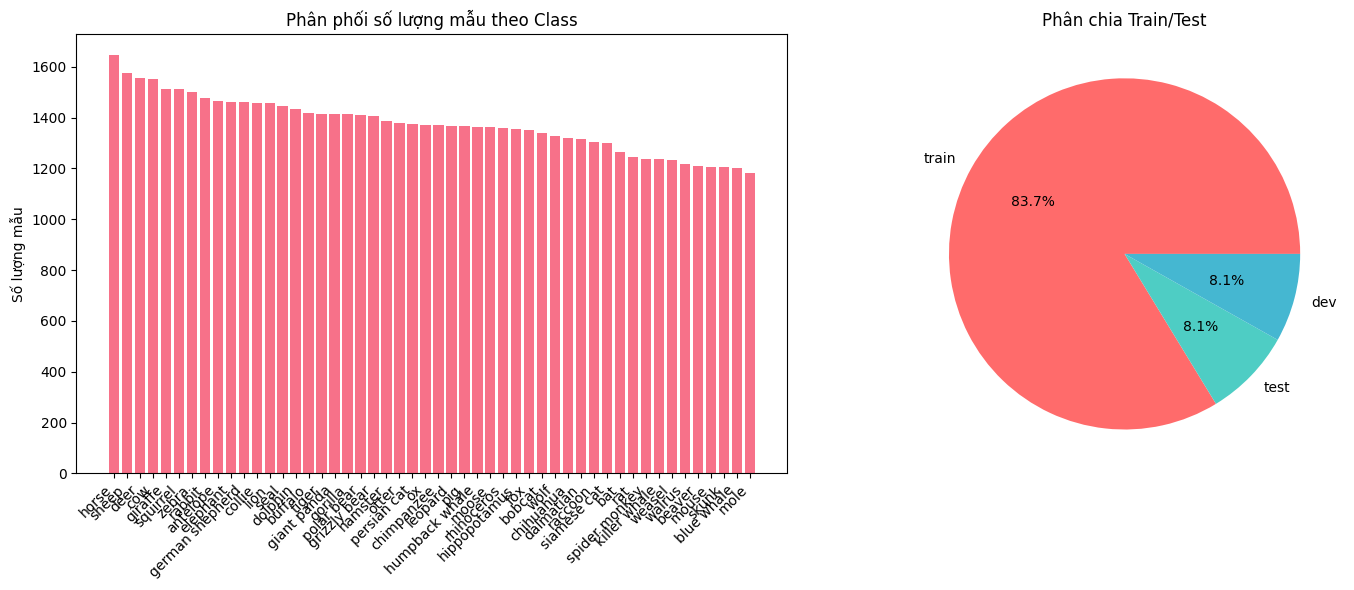


3. PHÂN TÍCH PCA:


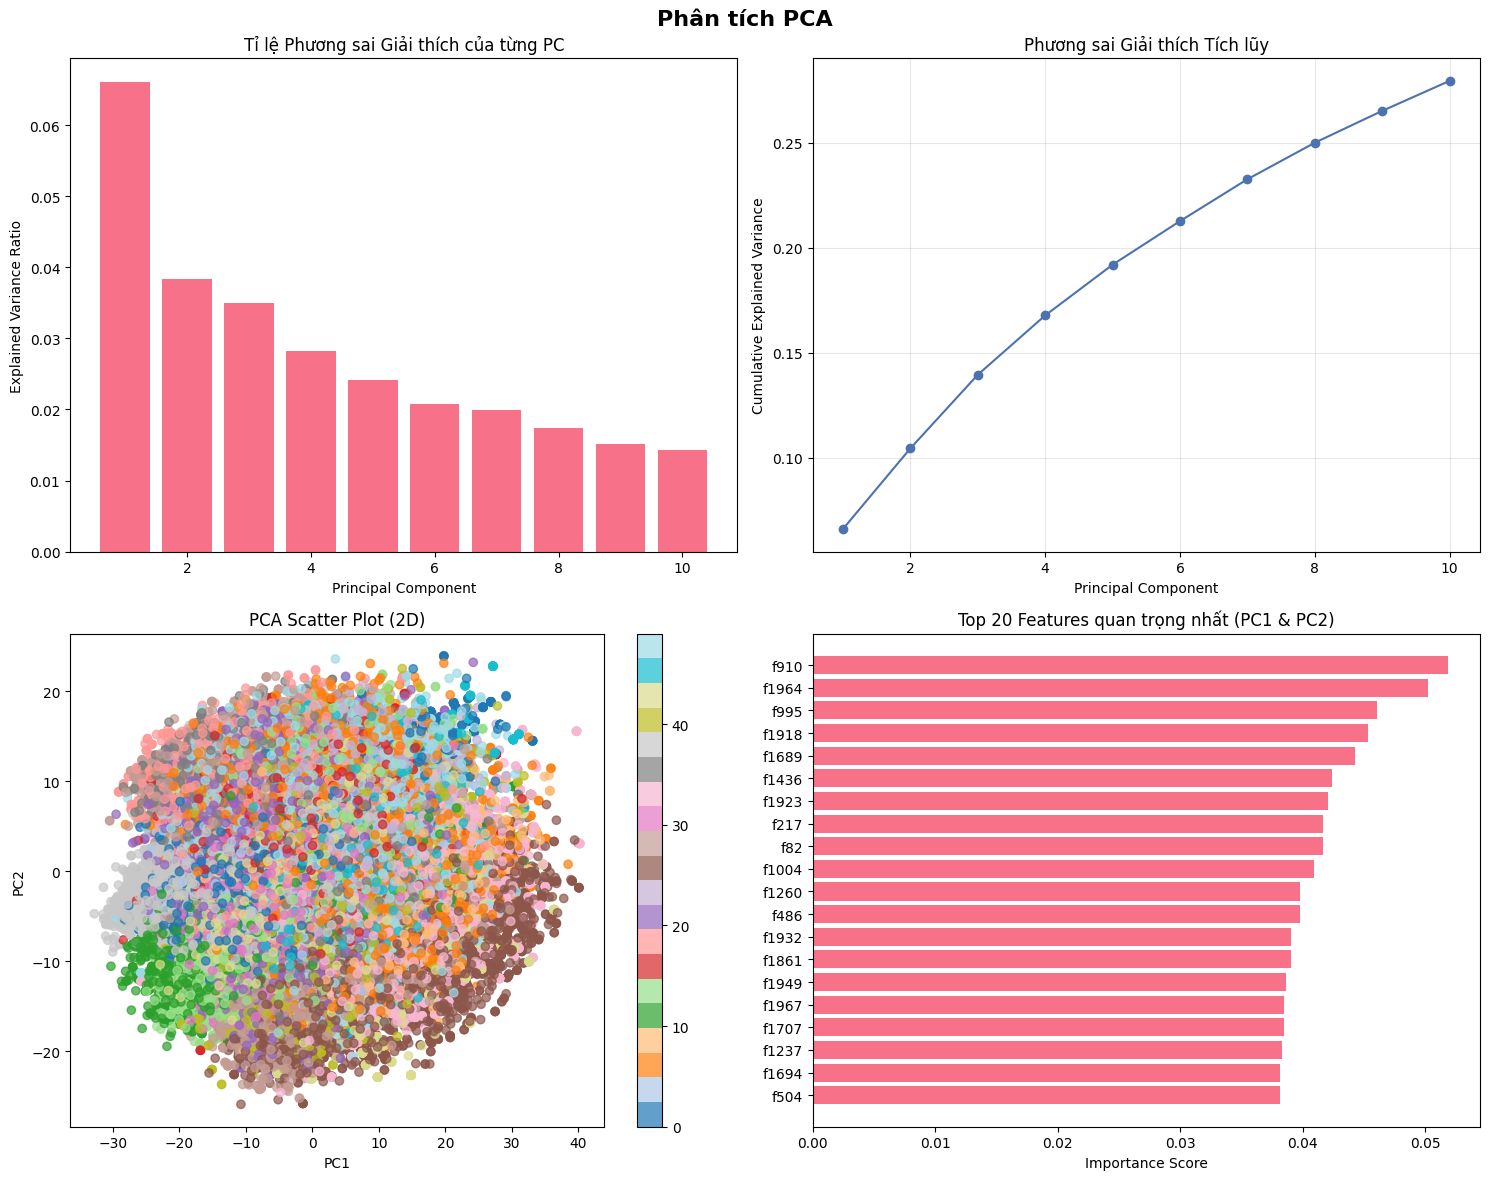


4. TRỰC QUAN HÓA TƯƠNG TÁC:
   Đang tạo PCA plot...


   Đang tạo t-SNE plot...
Đang chạy t-SNE... (có thể mất vài phút)


   Đang tạo UMAP plot...
Đang chạy UMAP...



5. PHÂN TÍCH FEATURES:


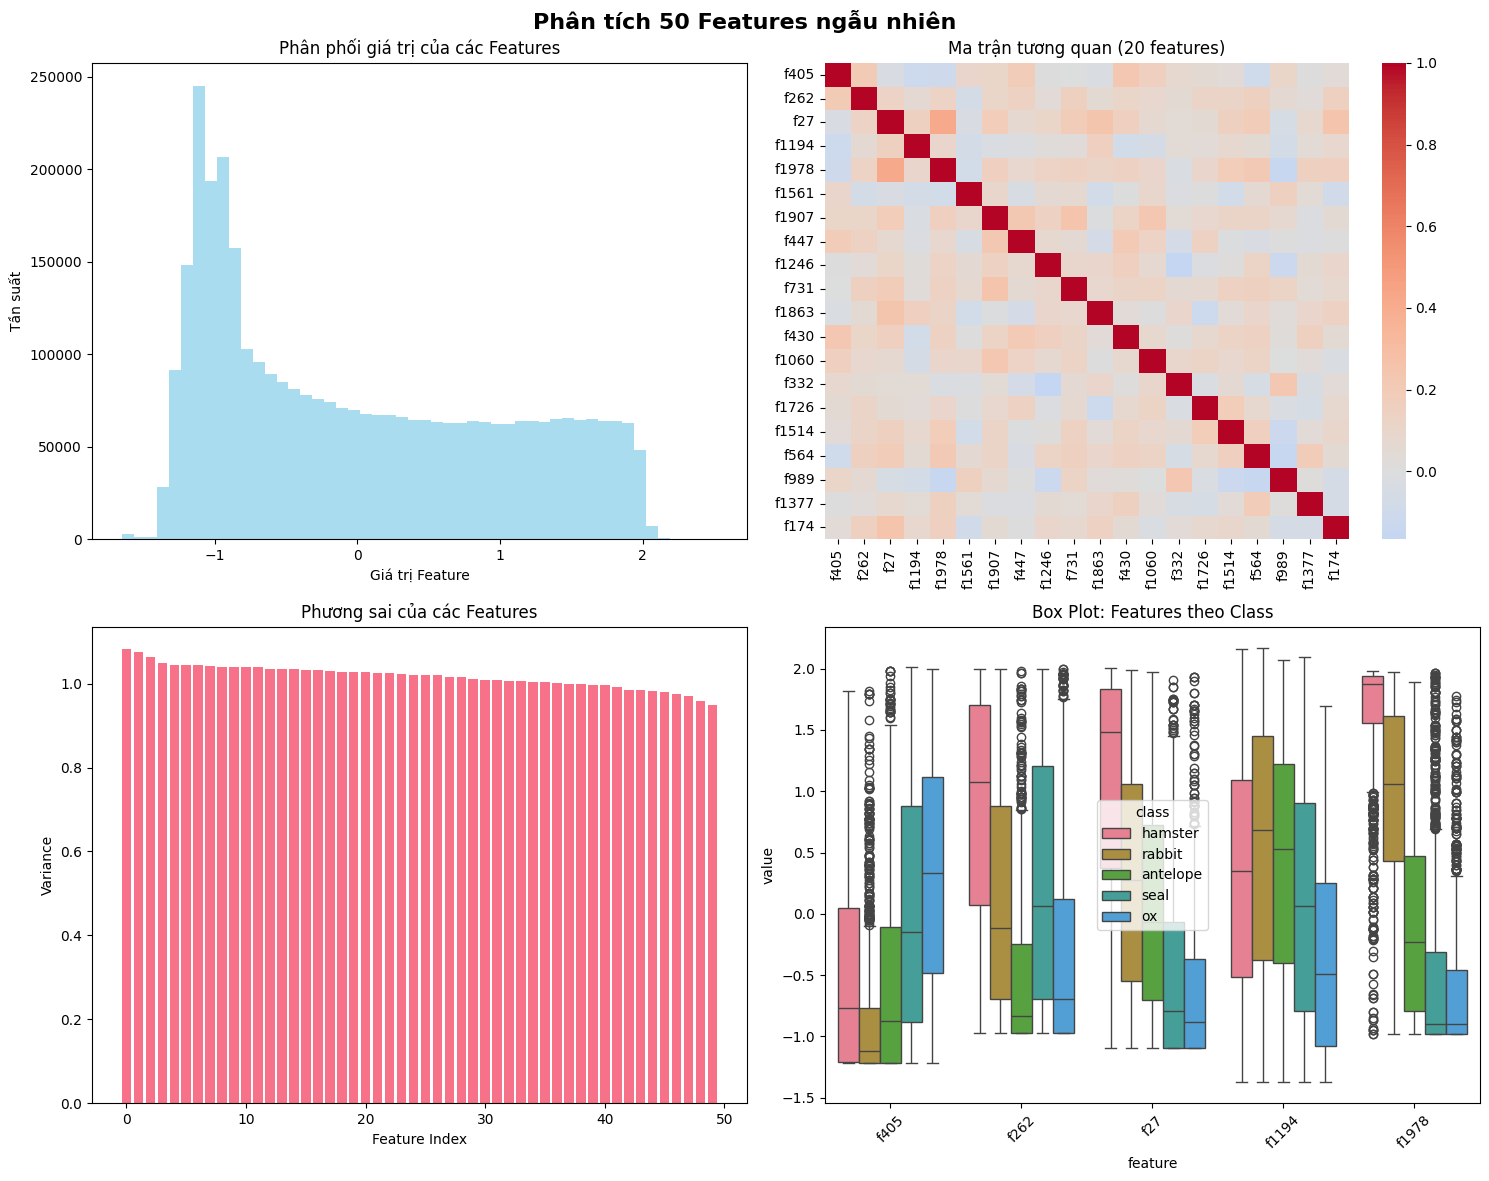


=== HOÀN THÀNH DASHBOARD ===


In [ ]:

viz_tool = DataVisualizationTool(df)
viz_tool.create_comprehensive_dashboard()